# Predict Zoo Animal Name

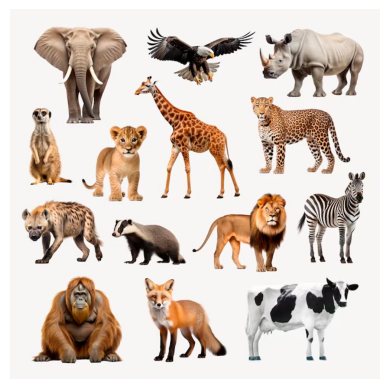

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import pillow_avif  # Register AVIF support

# Define the image file path
image_path = r"C:/Users/ssour/Downloads/diverse-wildlife-animals-collection_53876-207388.avif"

# Open an image file
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axes for image display
plt.show()

# Import Datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\ssour\OneDrive\Desktop\Zoo.csv")

In [4]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.tail()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [6]:
df['animal_name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

Here i can see that there are so many unique data so i Delete the anima_name columns

In [7]:
df.drop('animal_name',inplace = True,axis= 1)

Here we can see that all columns where my class_type is my target variable.

We use classification to predict class_type

Class_Number	Class_Type
1	Mammal
2	Bird
3	Reptile
4	Fish
5	Amphibian
6	Bug
7	Invertebrate

Here i can see that all type of class

# Data Cleaning

In [8]:
df.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

There is no null vaues in these datasets

In [9]:
# Now check datatypes
df.dtypes

hair          int64
feathers      int64
eggs          int64
milk          int64
airborne      int64
aquatic       int64
predator      int64
toothed       int64
backbone      int64
breathes      int64
venomous      int64
fins          int64
legs          int64
tail          int64
domestic      int64
catsize       int64
class_type    int64
dtype: object

In [10]:
print("The dimensions of these datasets: ",df.shape)
print("The columns of these datasets: ",df.columns)

The dimensions of these datasets:  (101, 17)
The columns of these datasets:  Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'class_type'],
      dtype='object')


In [11]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<Axes: >

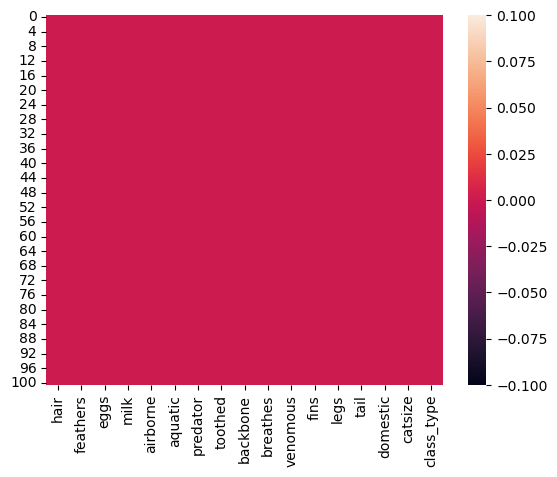

In [12]:
sns.heatmap(df.isnull())

In [13]:
# Categorical columns
categorical_col =[]
for i in df.dtypes.index:
    if df[i].dtypes== 'object':
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)

# Numerical columns
numerical_col =[]
for i in df.dtypes.index:
    if df[i].dtypes!= 'object':
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Categorical Columns:  []
Numerical Columns:  ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


# Exploratory Data Analysis

In [14]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'class_type'],
      dtype='object')

In [15]:
df.dtypes

hair          int64
feathers      int64
eggs          int64
milk          int64
airborne      int64
aquatic       int64
predator      int64
toothed       int64
backbone      int64
breathes      int64
venomous      int64
fins          int64
legs          int64
tail          int64
domestic      int64
catsize       int64
class_type    int64
dtype: object

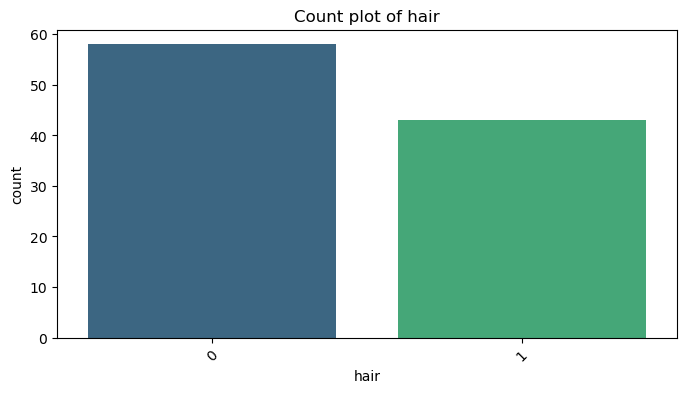

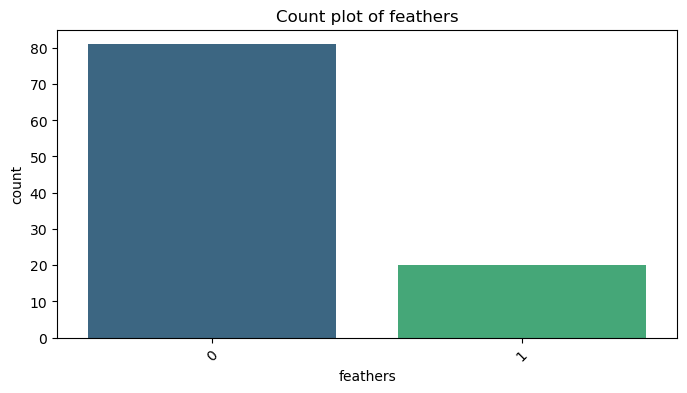

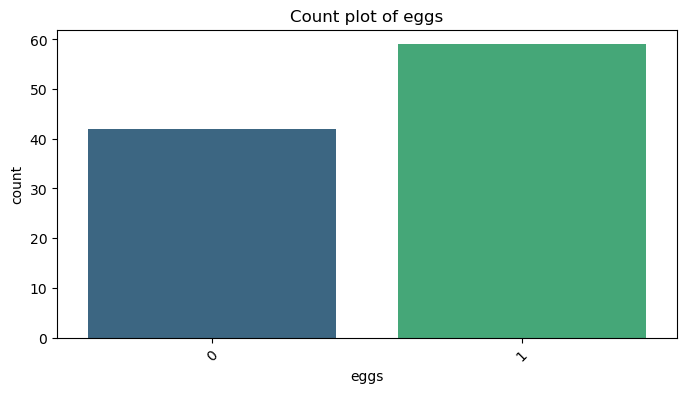

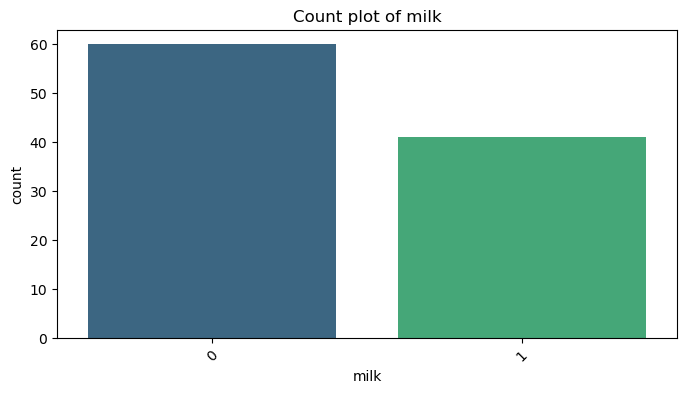

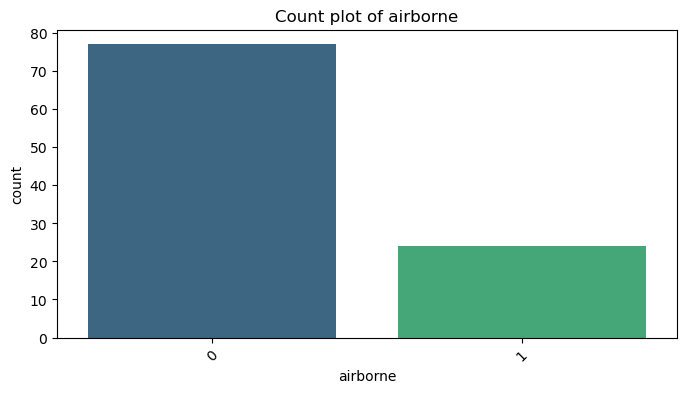

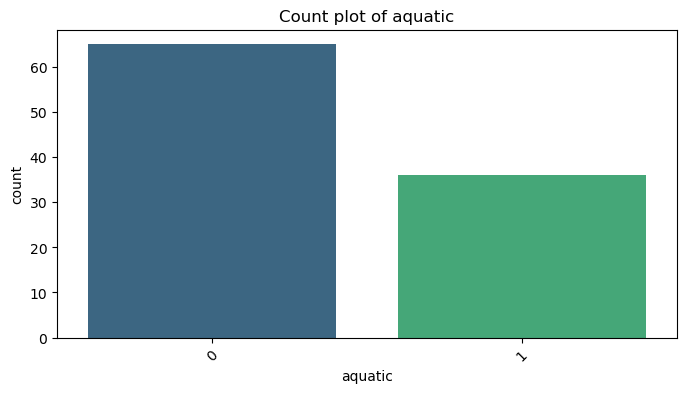

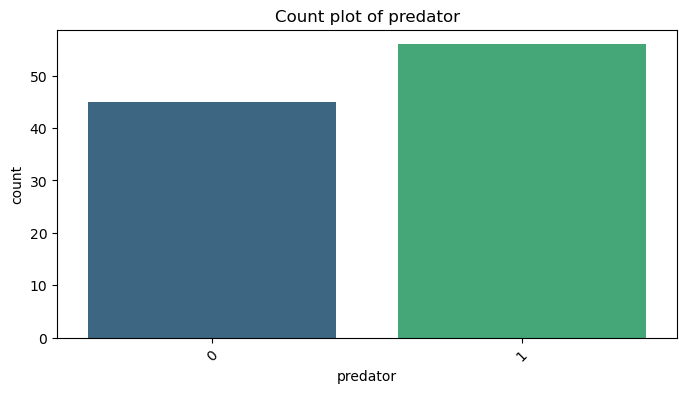

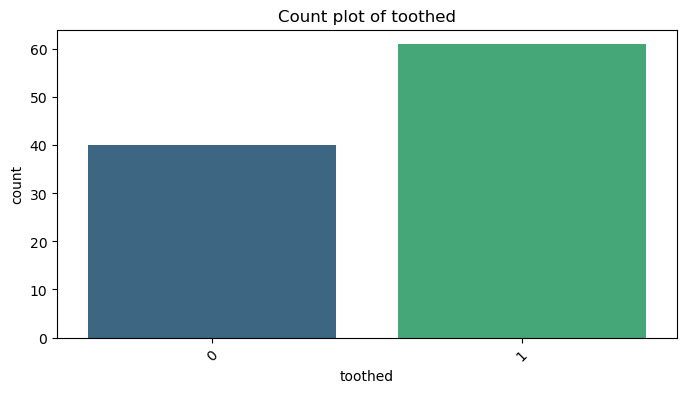

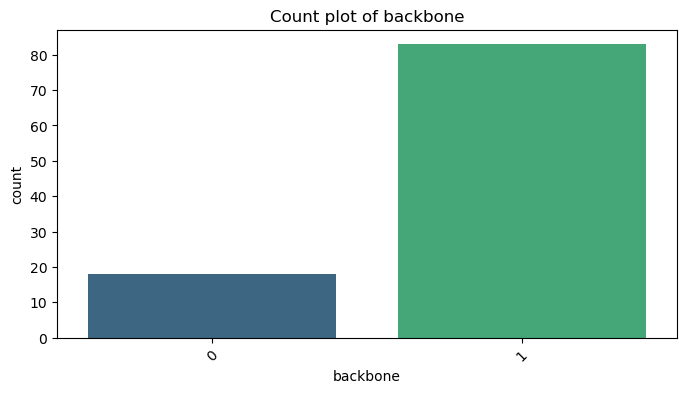

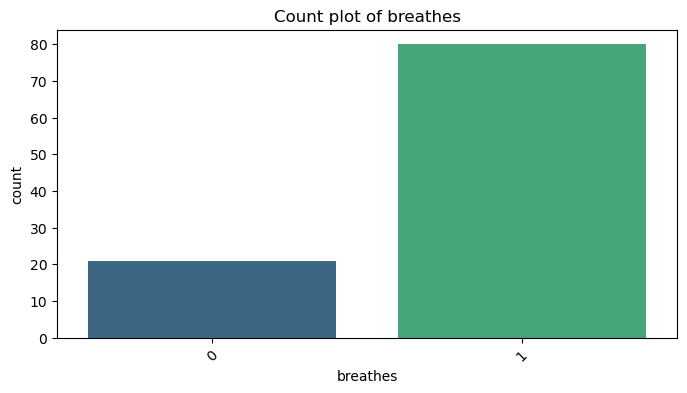

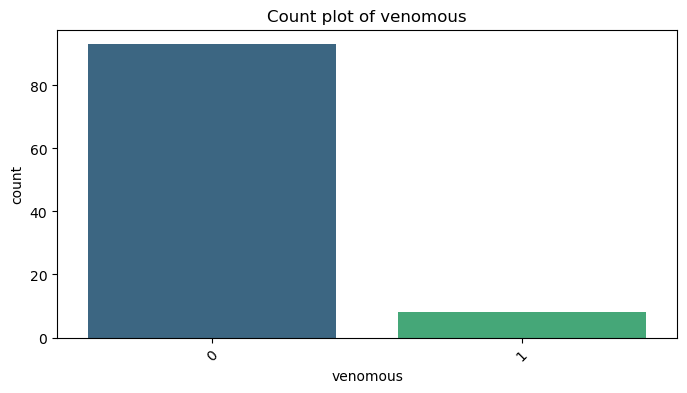

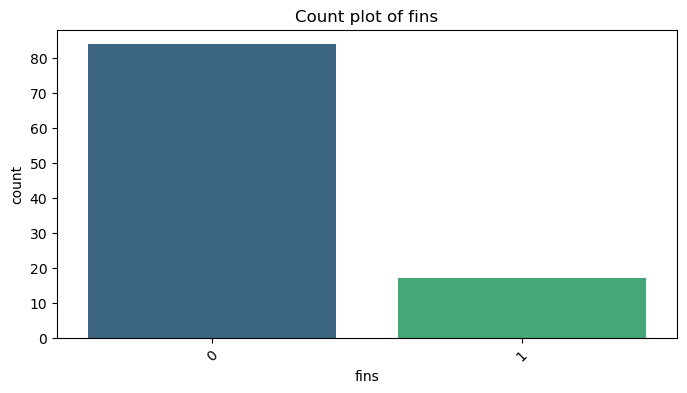

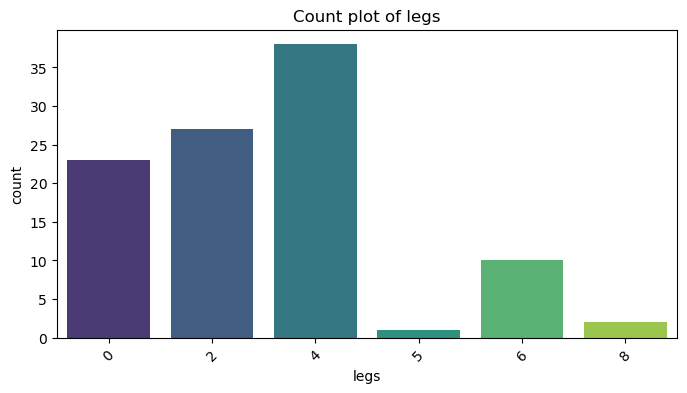

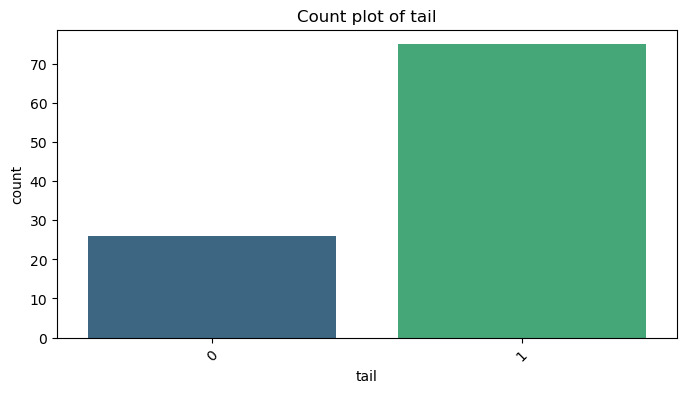

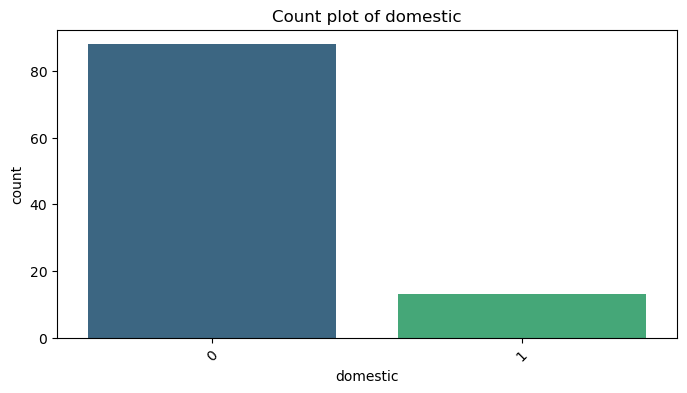

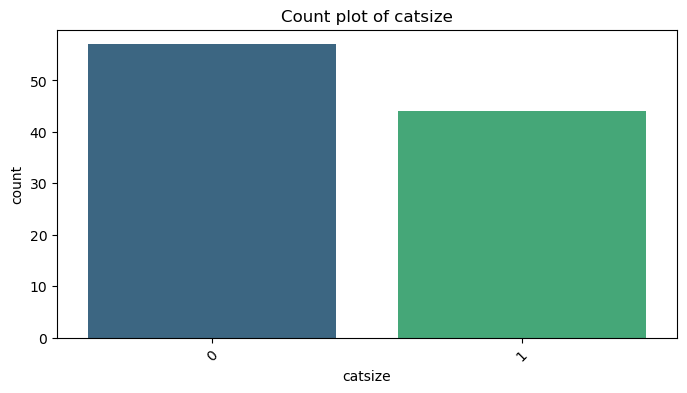

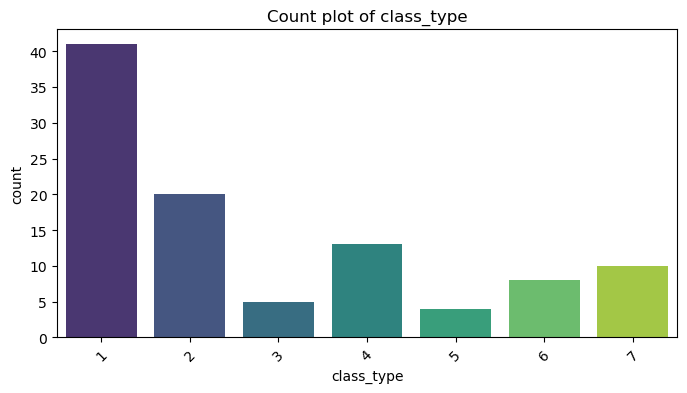

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette globally
sns.set_palette("pastel")  # You can choose any palette like "bright", "dark", "muted", etc.

# Plot countplots for each numerical_column
numerical_column = df.select_dtypes(include=['int64']).columns

for col in numerical_column:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette="viridis")  # You can specify palette for each plot
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

Here I can see all visualize

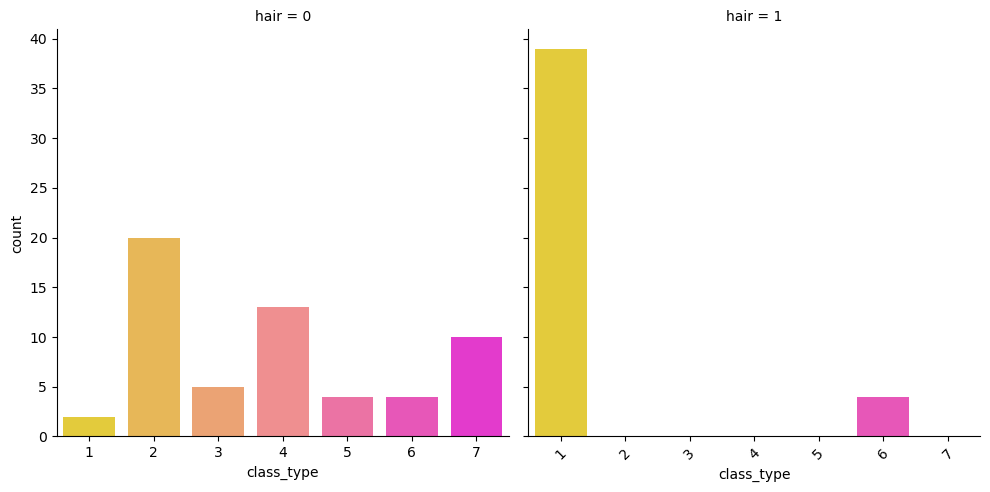

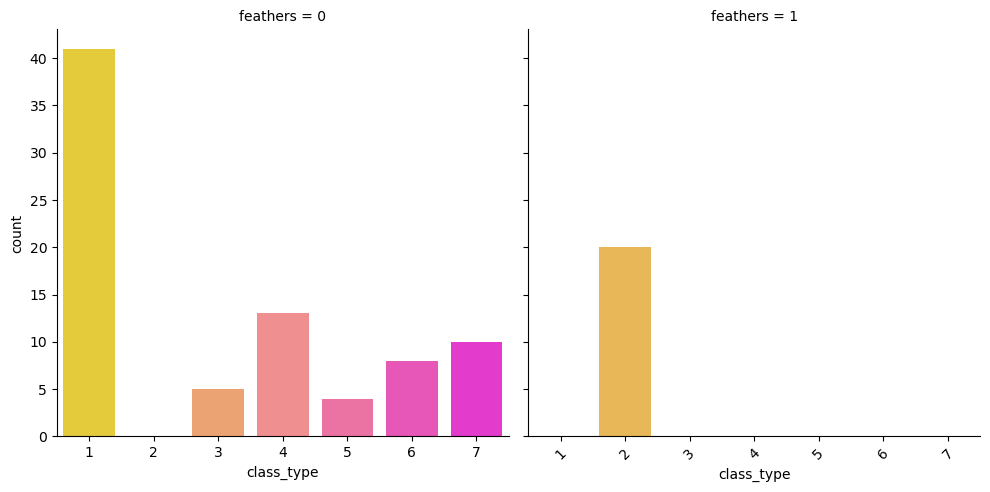

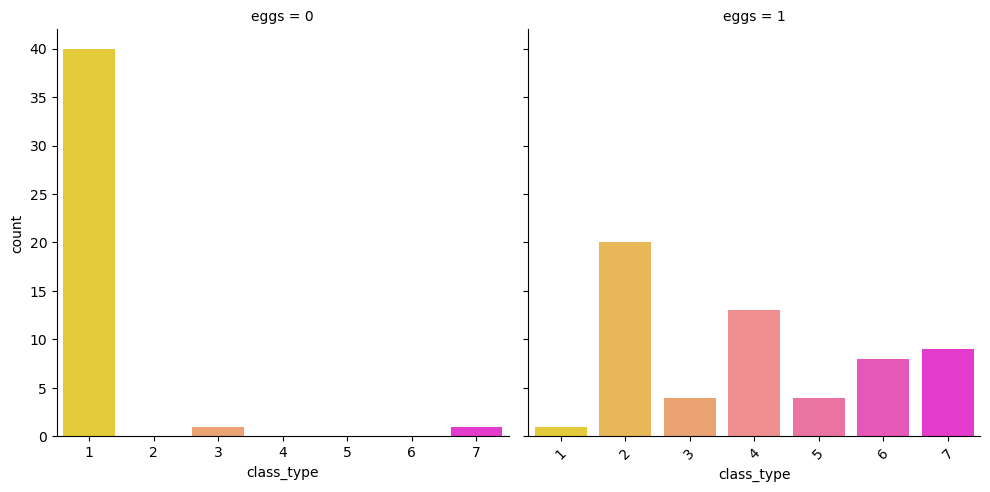

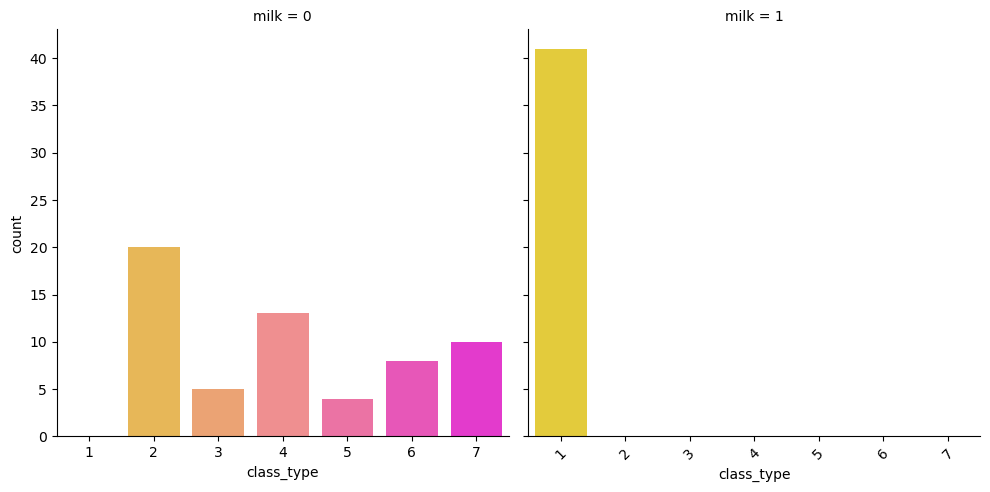

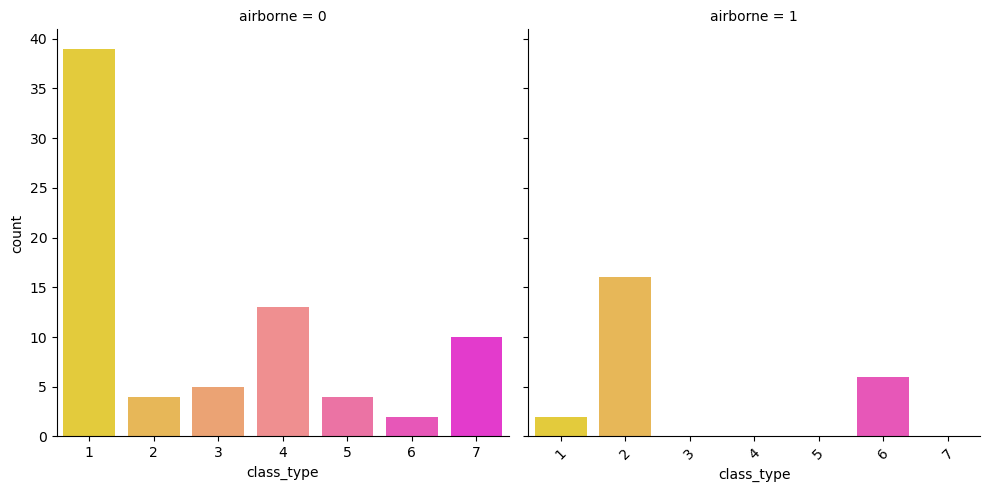

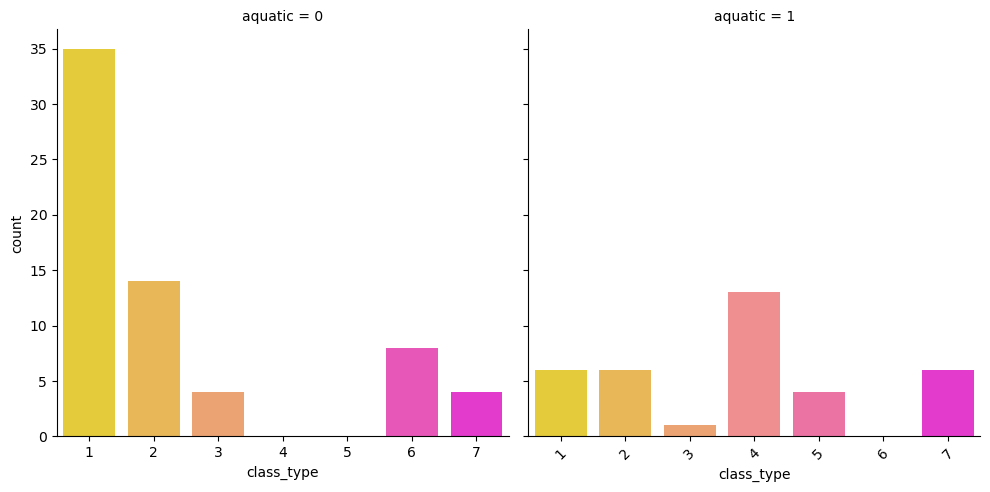

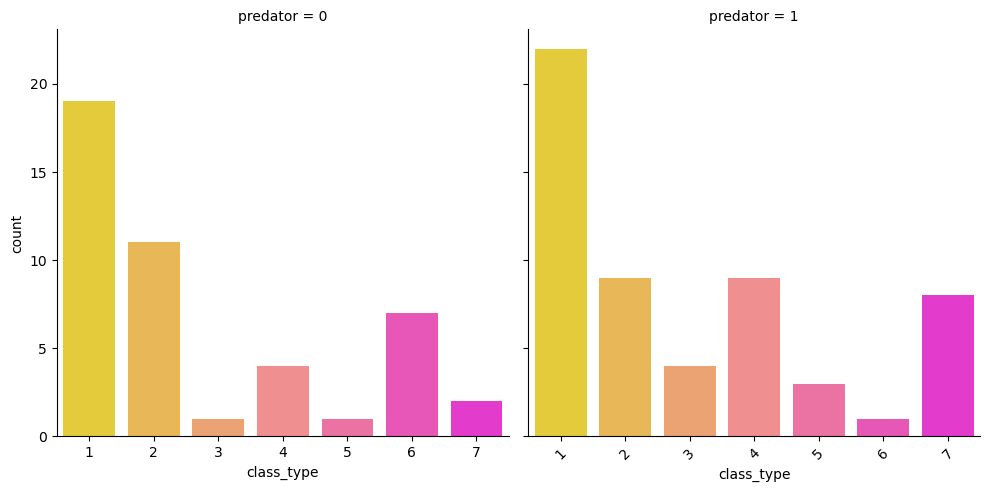

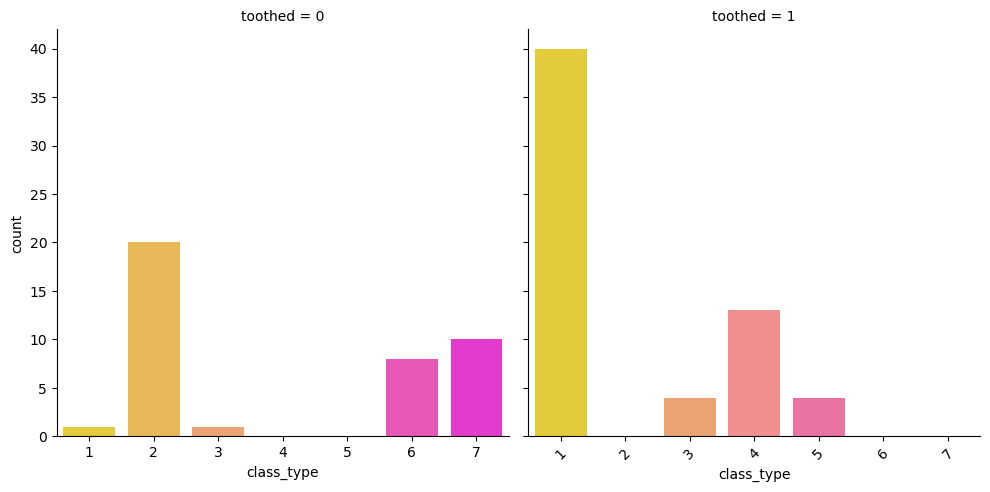

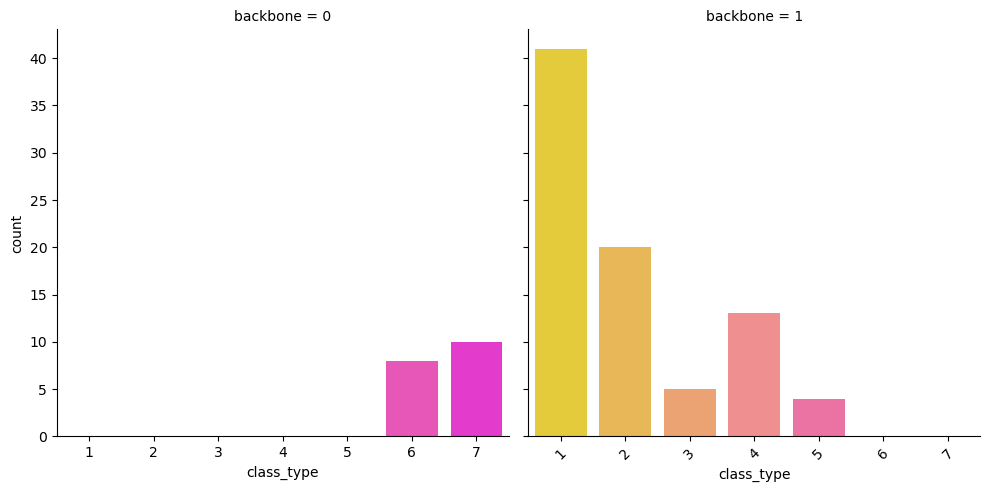

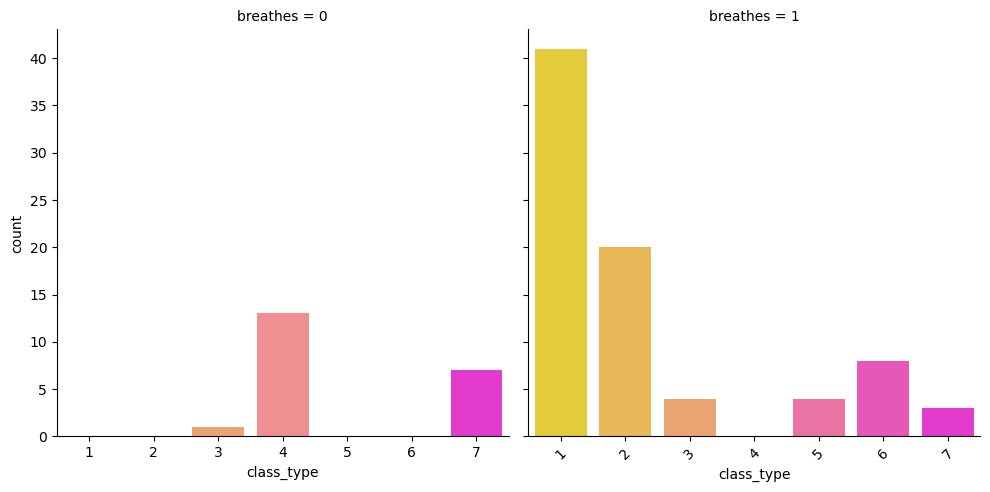

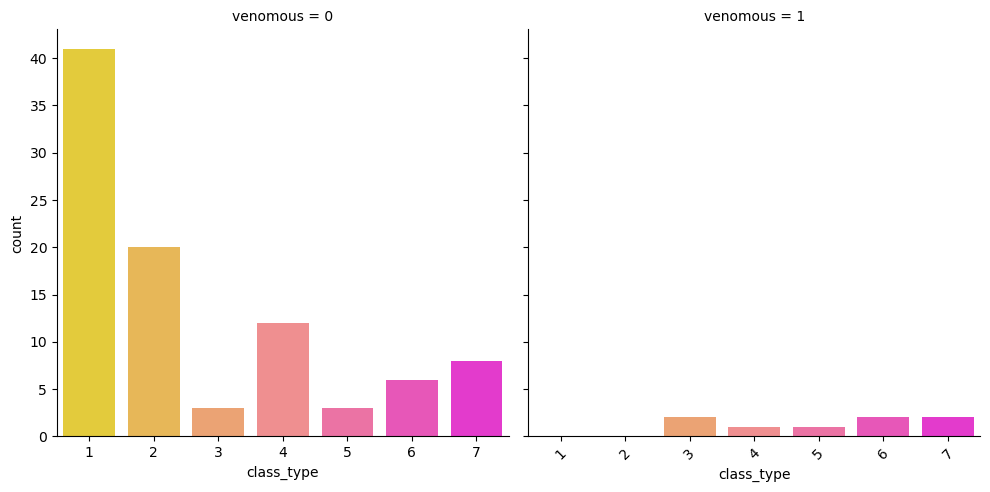

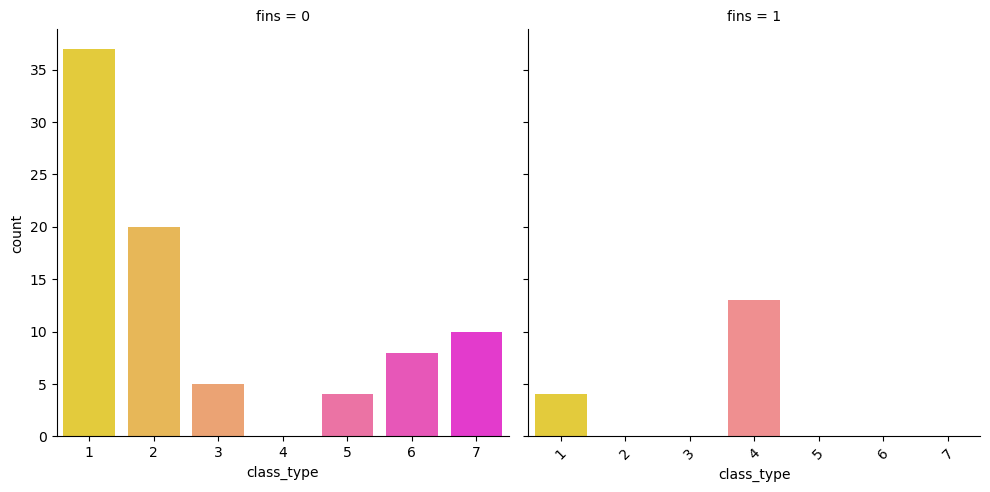

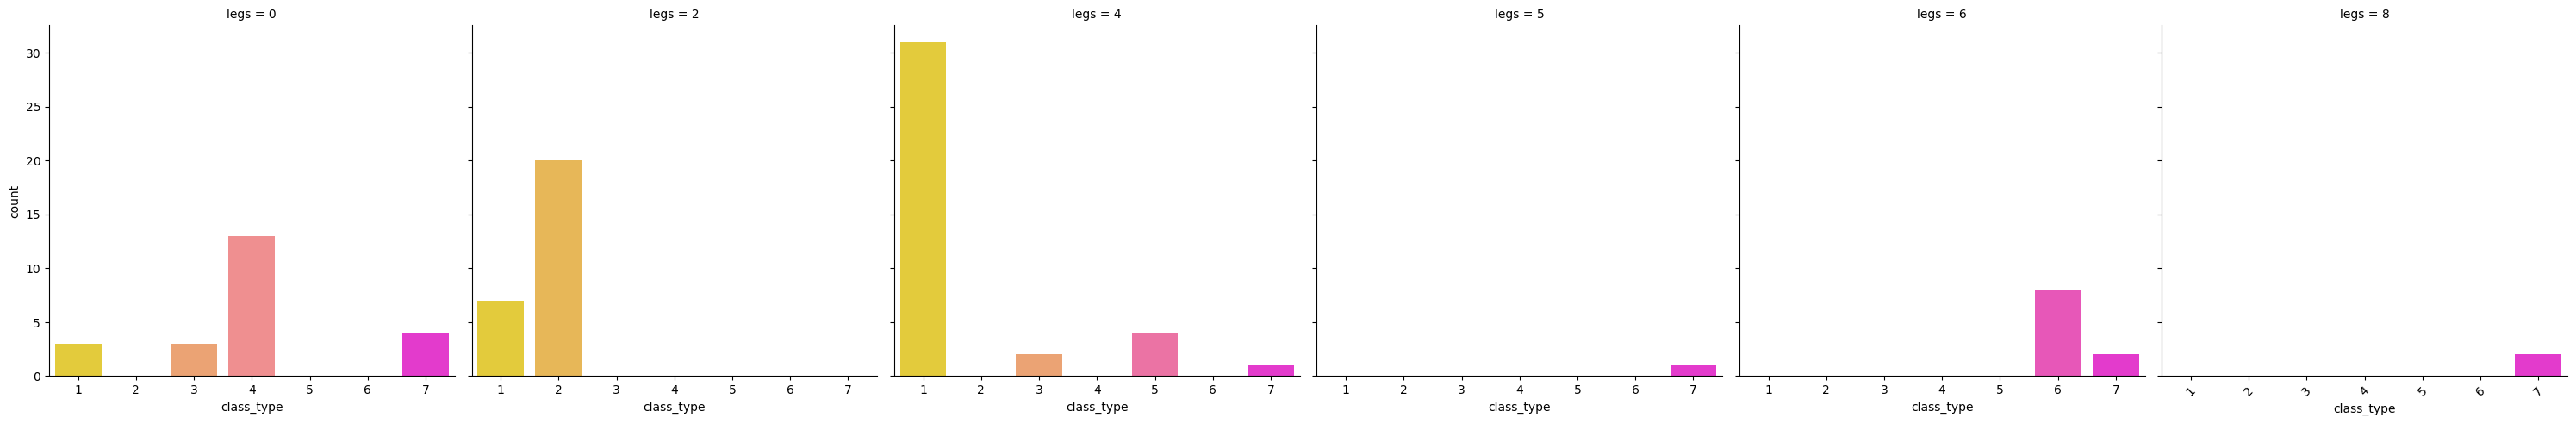

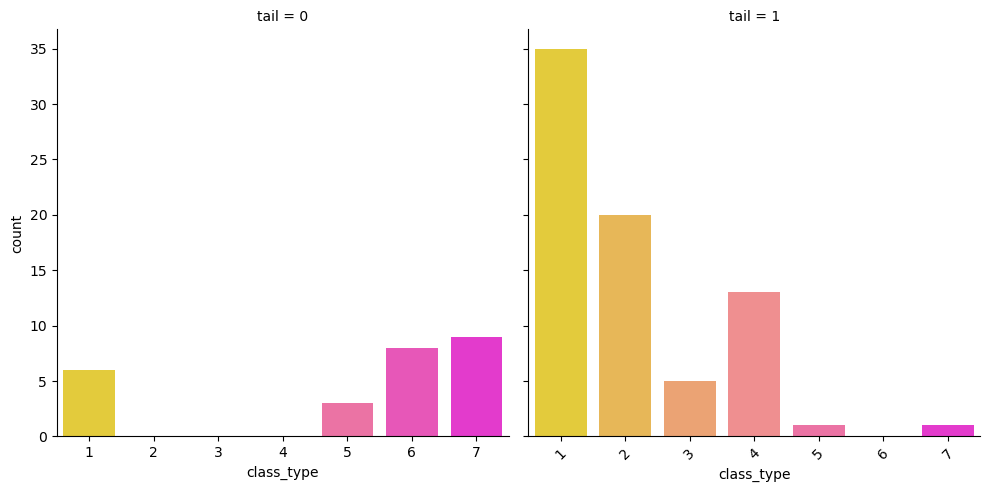

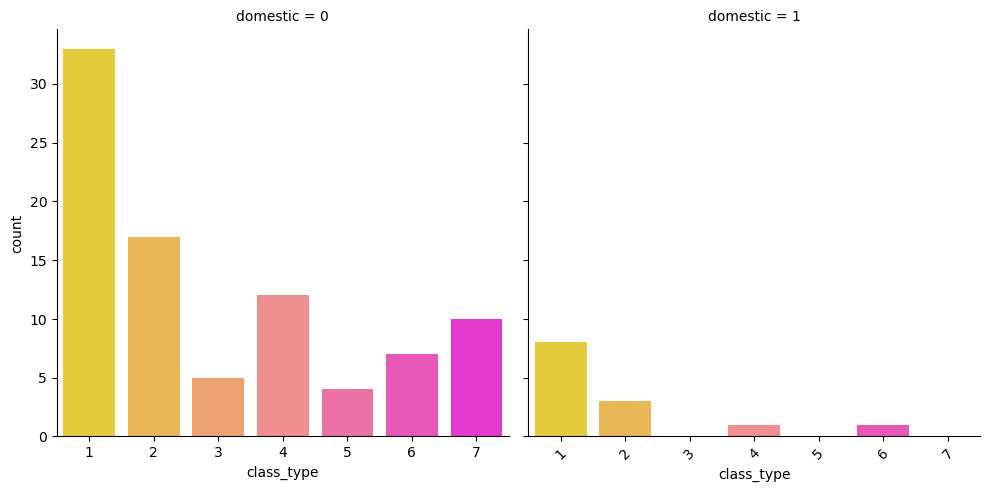

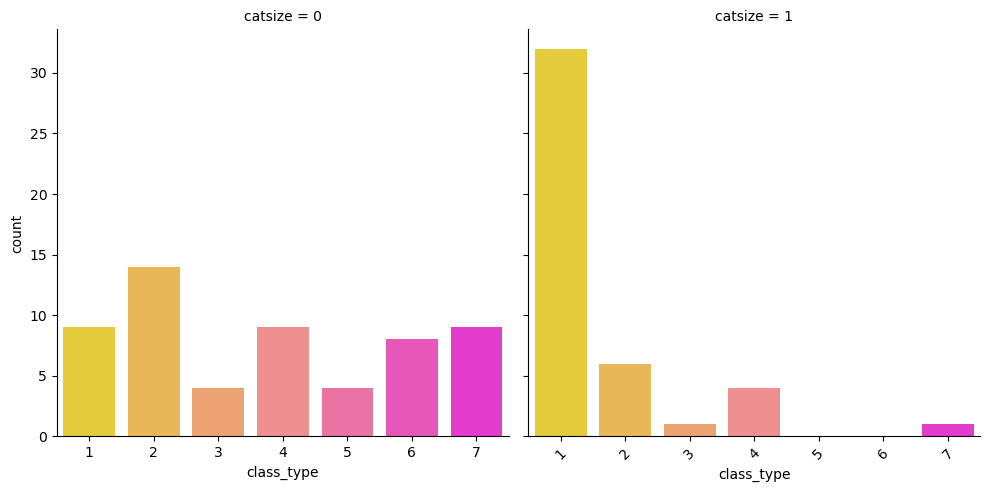

In [17]:
# Get the categorical columns (excluding 'class_type')
categorical_columns = df.select_dtypes(include=['int64']).columns

# Loop through each categorical column
for col in categorical_columns:
    if col != 'class_type':  # Exclude the 'class_type' itself from plotting
        sns.catplot(x="class_type", col=col, data=df, kind="count", palette="spring_r")
        plt.xticks(rotation=45)
        plt.show()

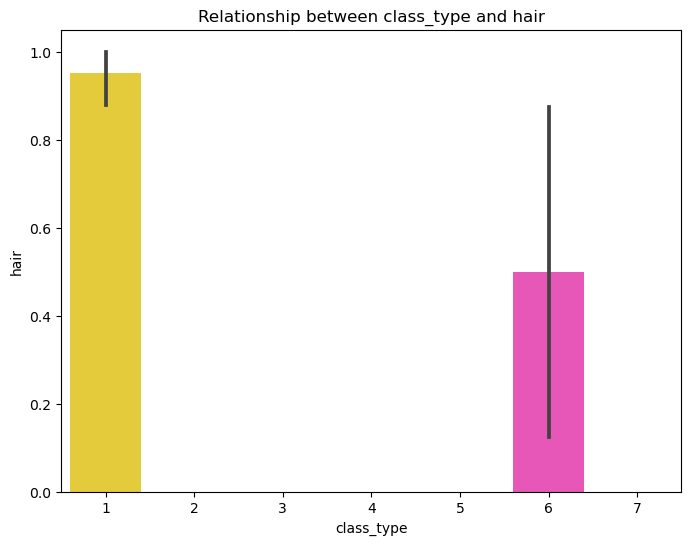

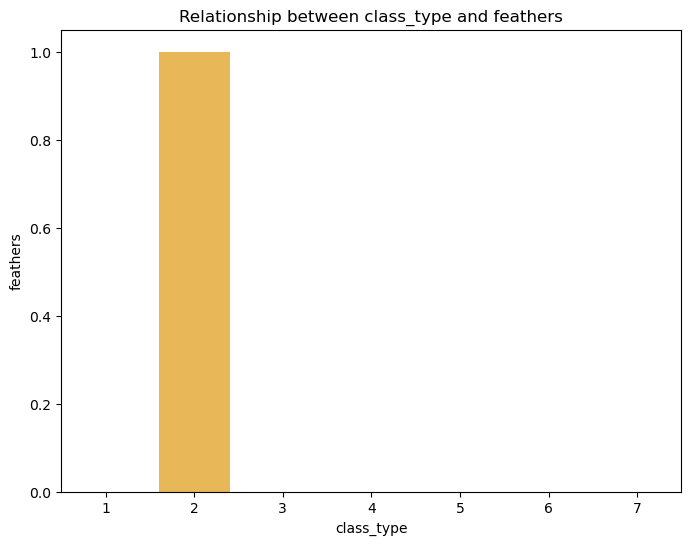

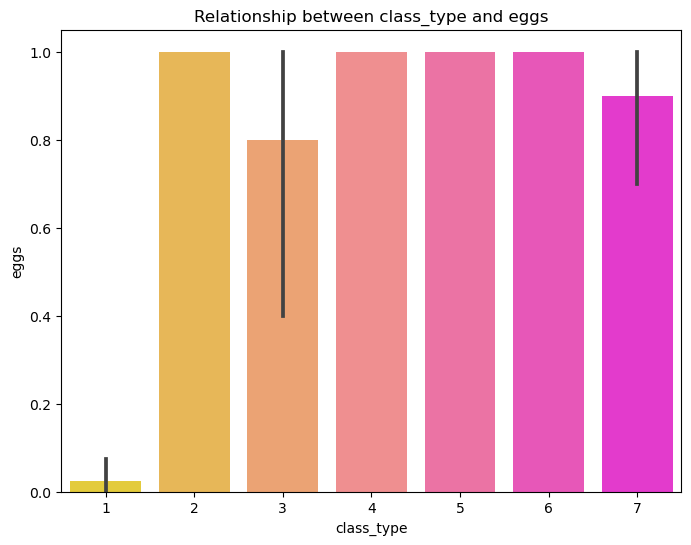

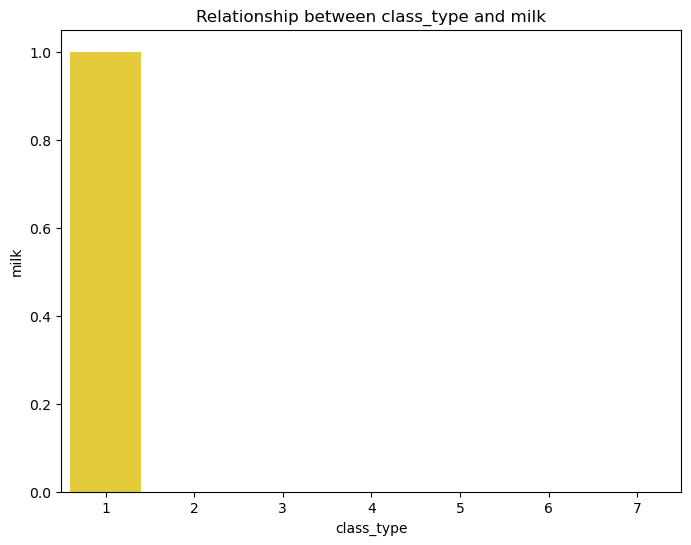

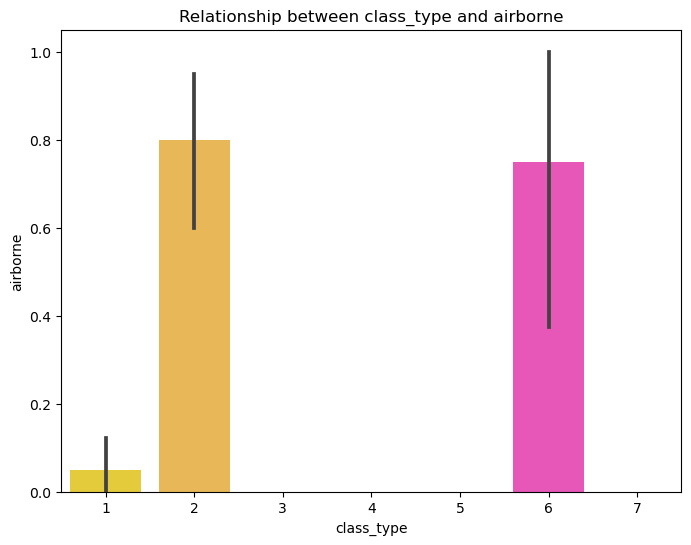

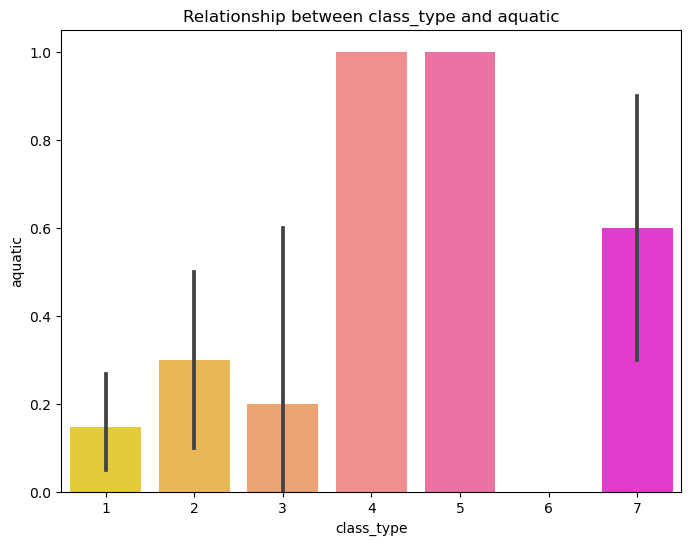

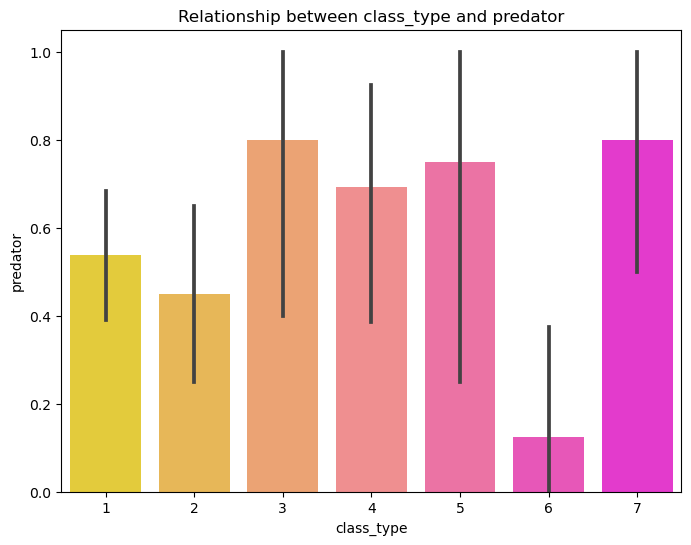

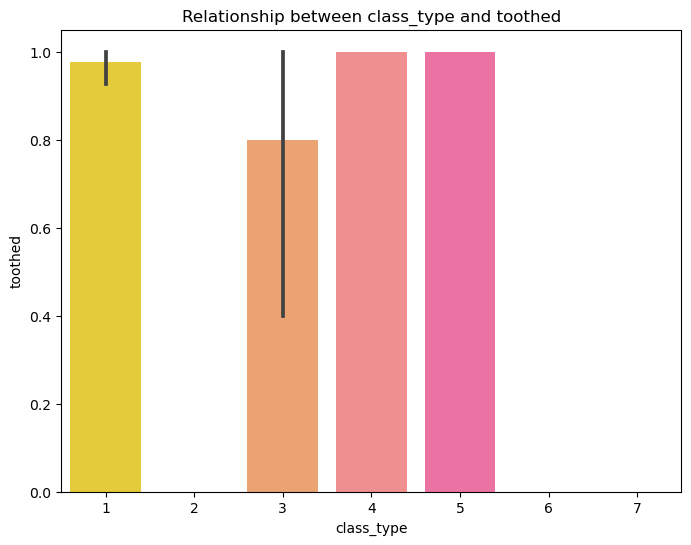

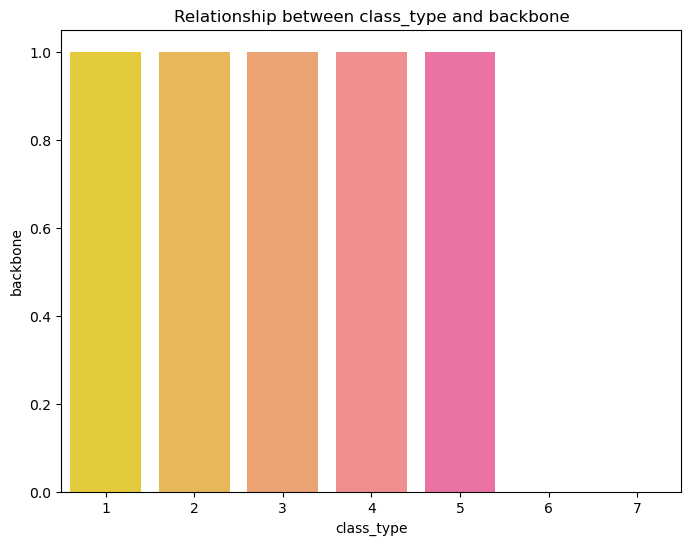

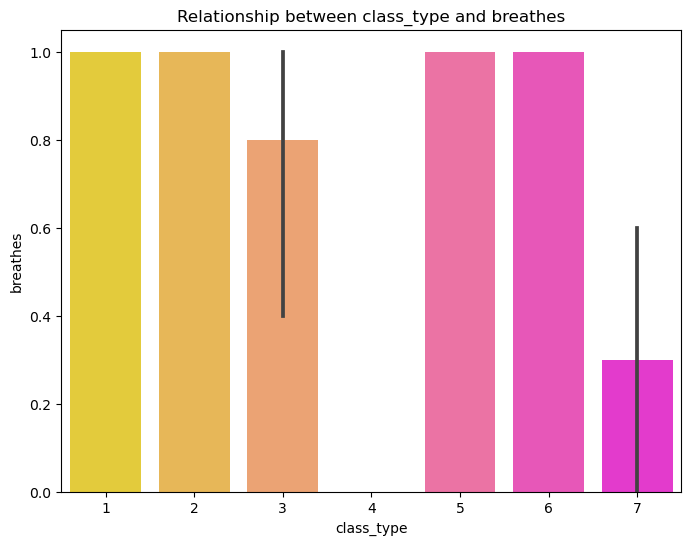

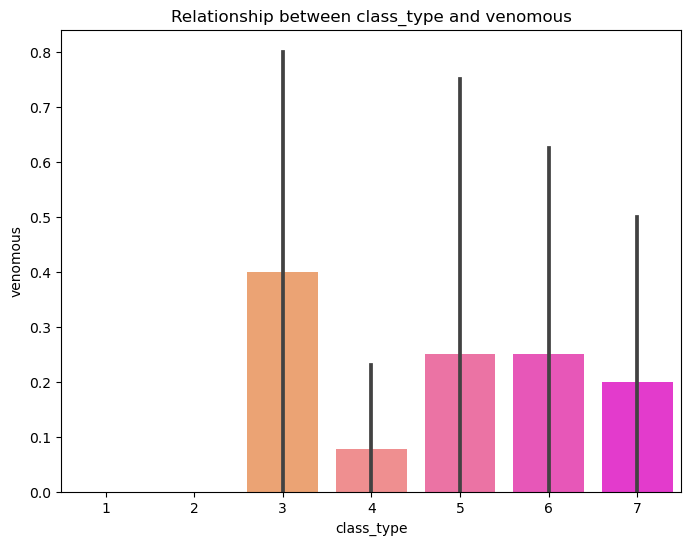

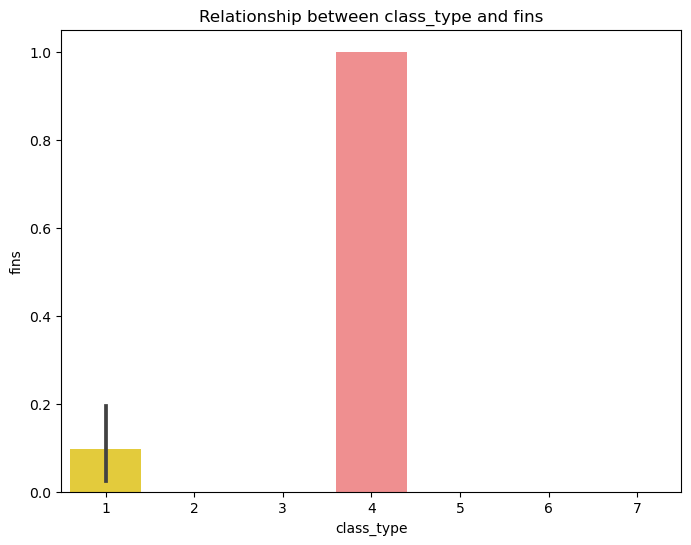

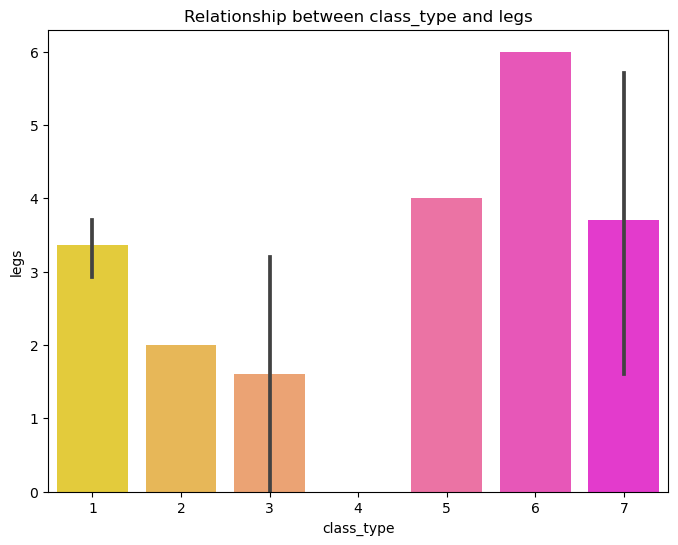

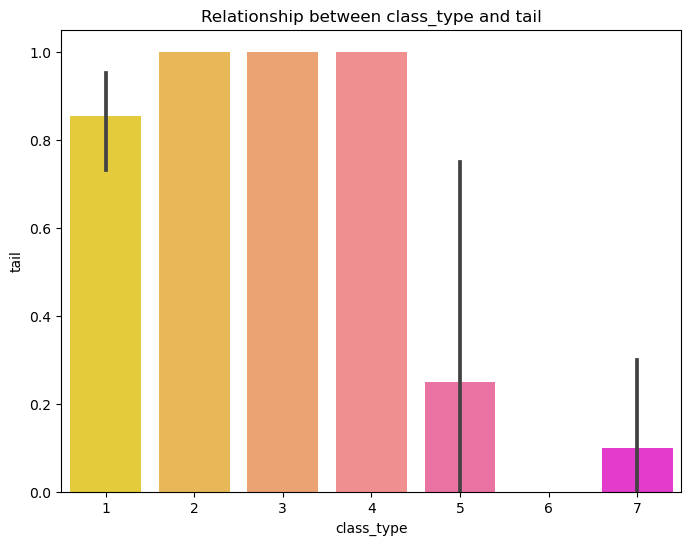

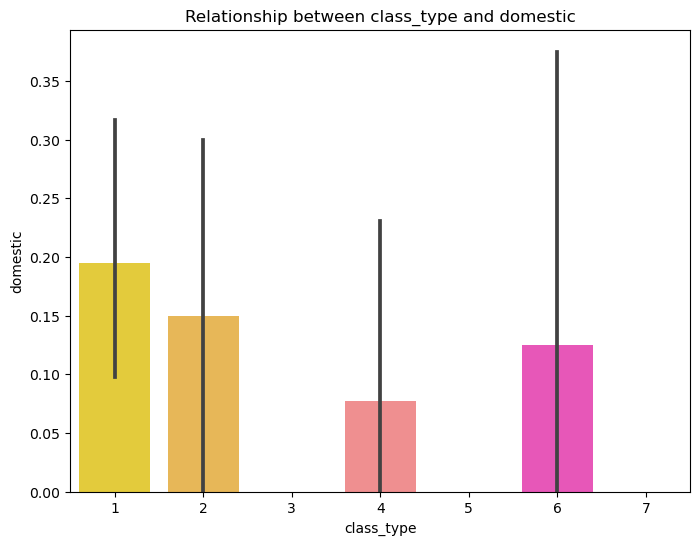

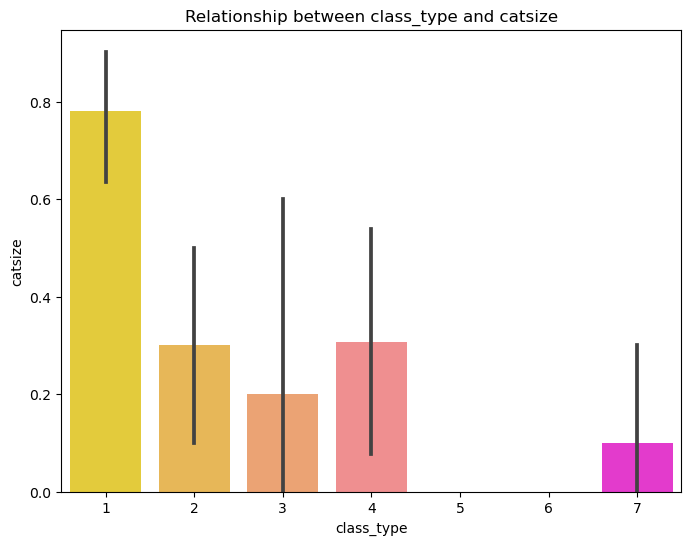

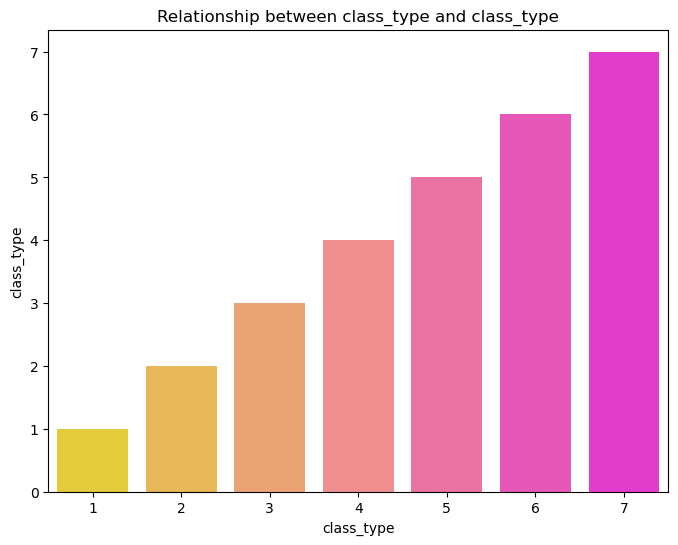

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get numeric columns to plot
numeric_columns = df.select_dtypes(include=['int64']).columns

# Loop through each numeric column and plot a bar plot
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x="class_type", y=col, data=df, palette="spring_r")
    plt.xlabel("class_type")
    plt.ylabel(col)
    plt.title(f"Relationship between class_type and {col}")
    plt.show()

# Checking how the data is distributed in each columns

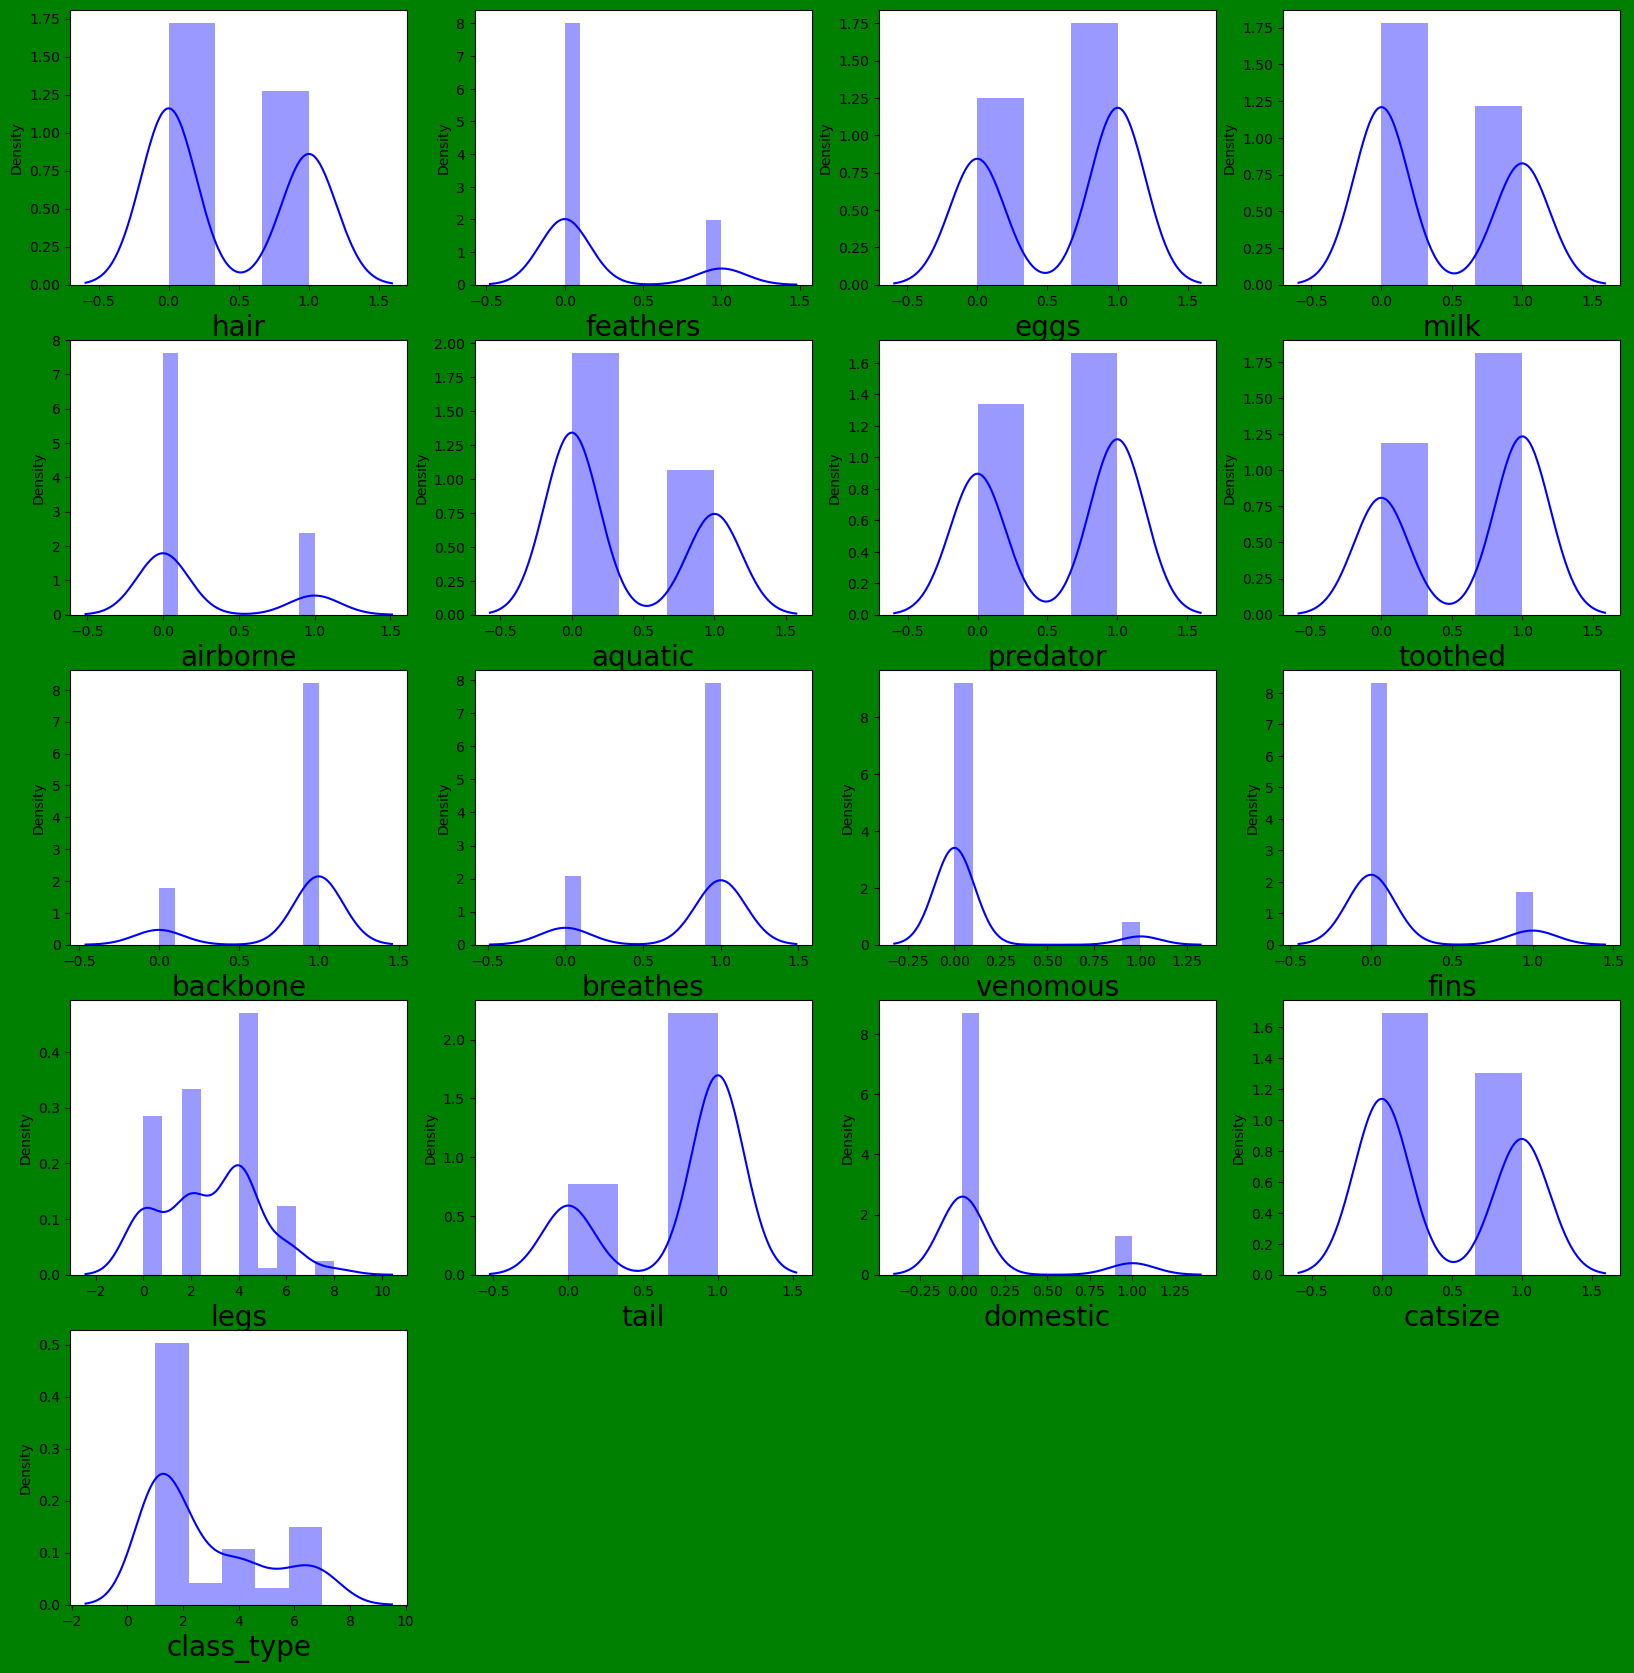

In [19]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in numerical_col:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

# Now Checking outliers

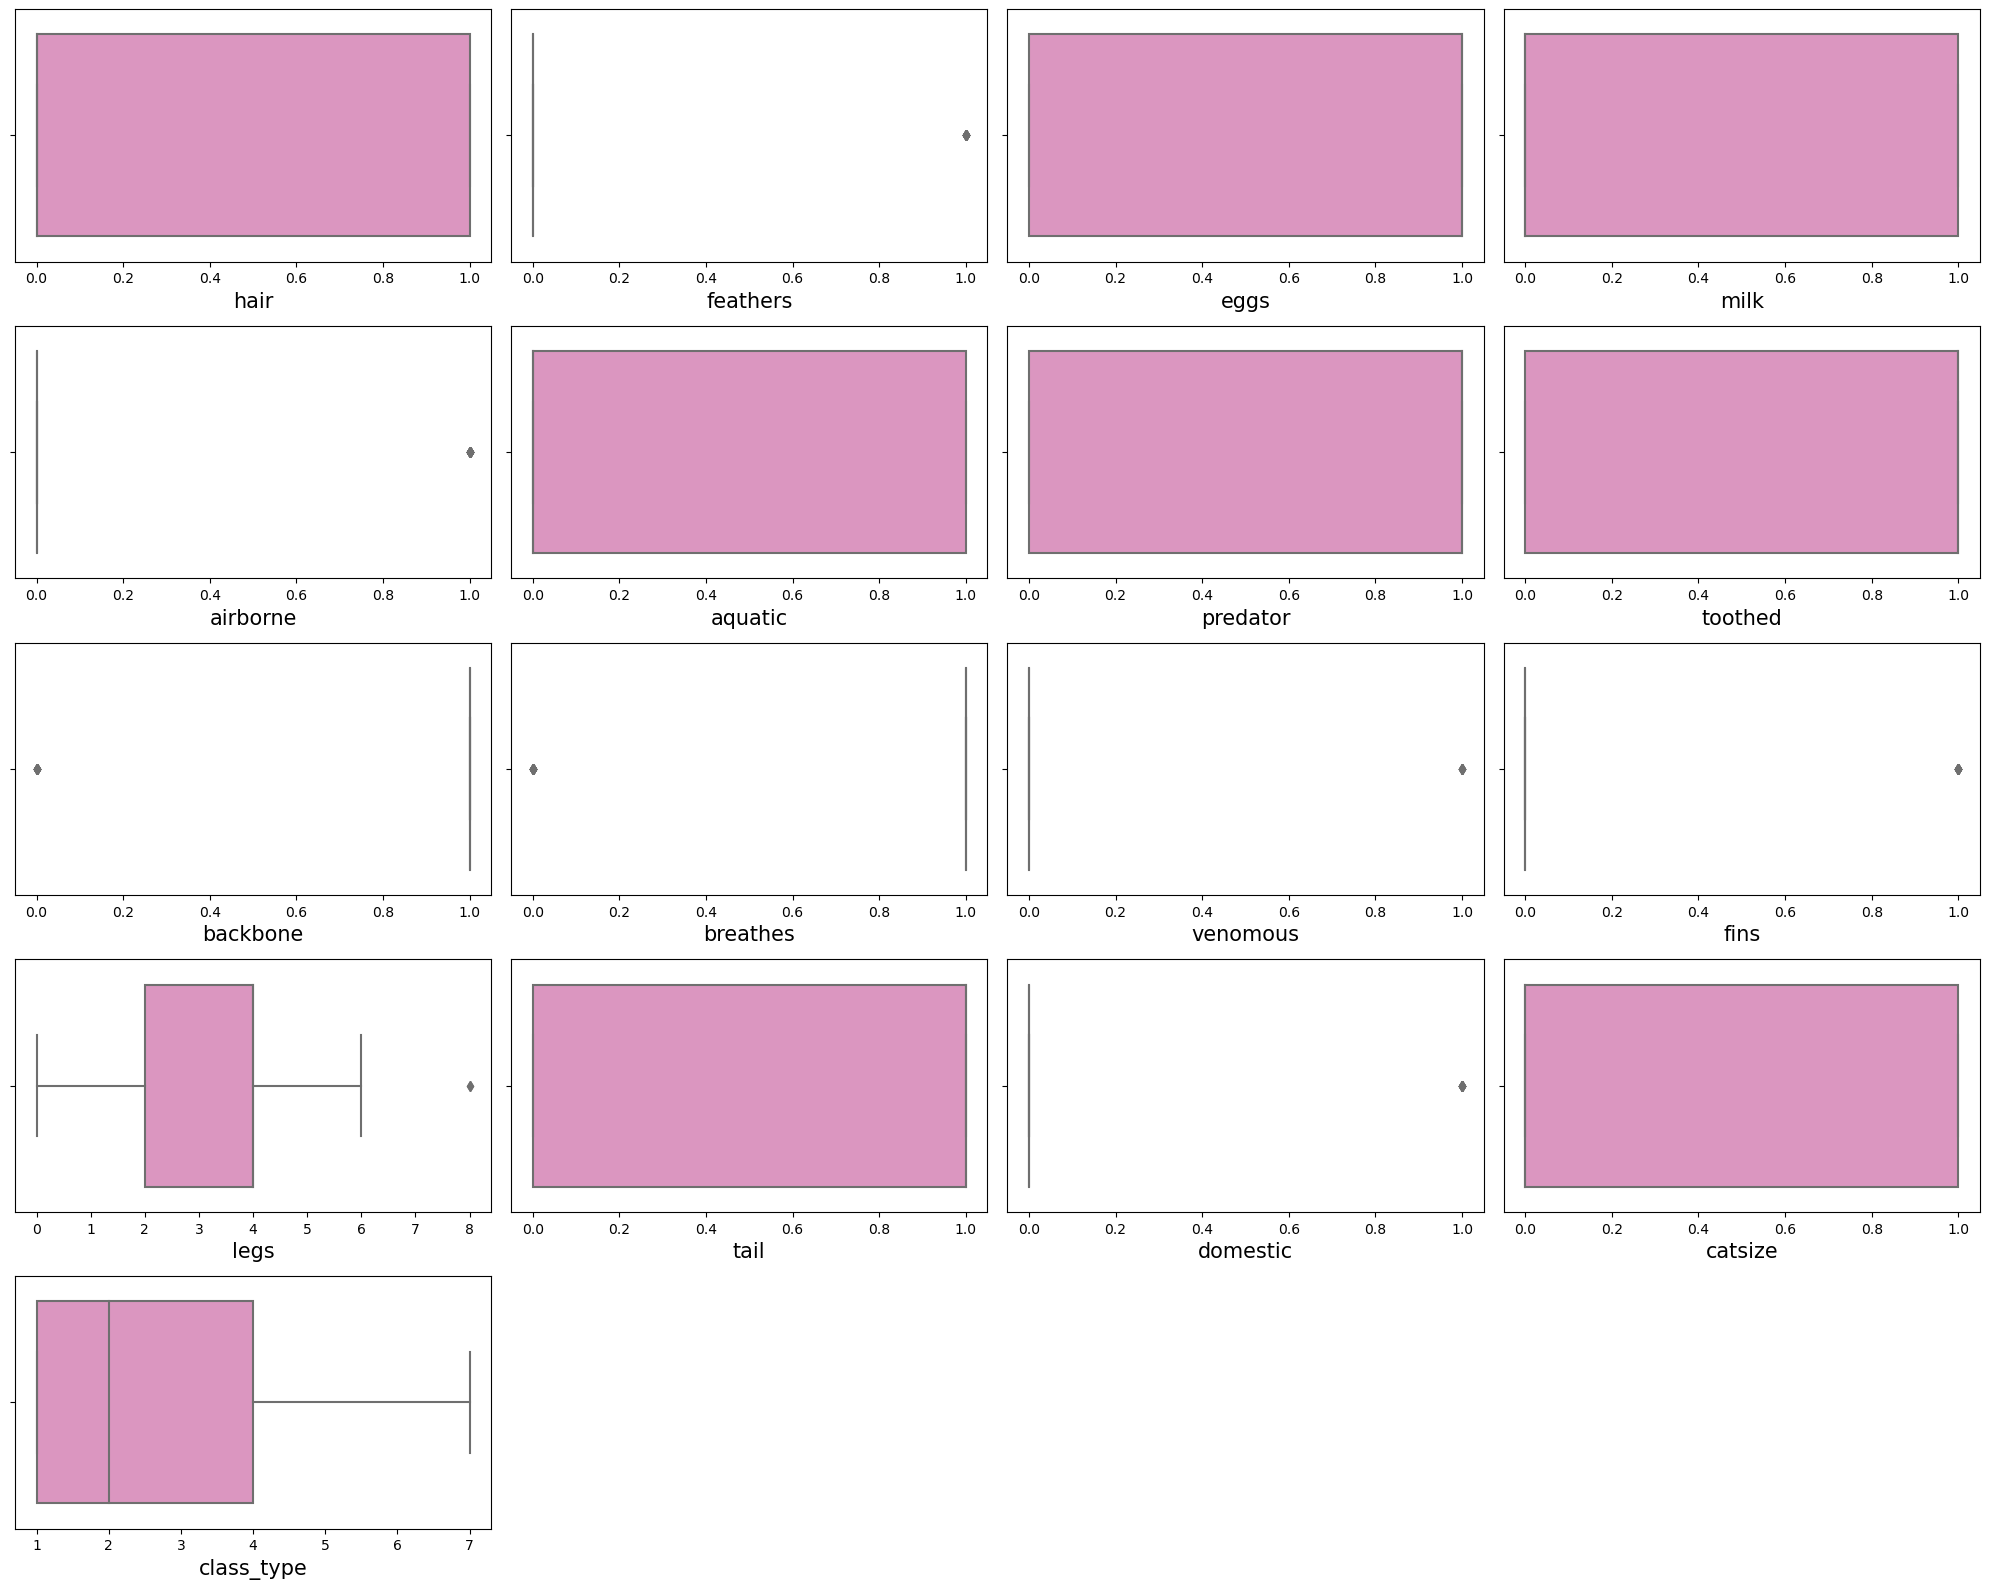

In [20]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

There is no outliers so no need to delete any type of data

# Checking For Skewness

In [21]:
df.skew()

hair          0.304908
feathers      1.538501
eggs         -0.346676
milk          0.388876
airborne      1.251556
aquatic       0.608577
predator     -0.222443
toothed      -0.431569
backbone     -1.707118
breathes     -1.461244
venomous      3.163428
fins          1.799849
legs          0.139427
tail         -1.126430
domestic      2.250991
catsize       0.263515
class_type    0.852362
dtype: float64

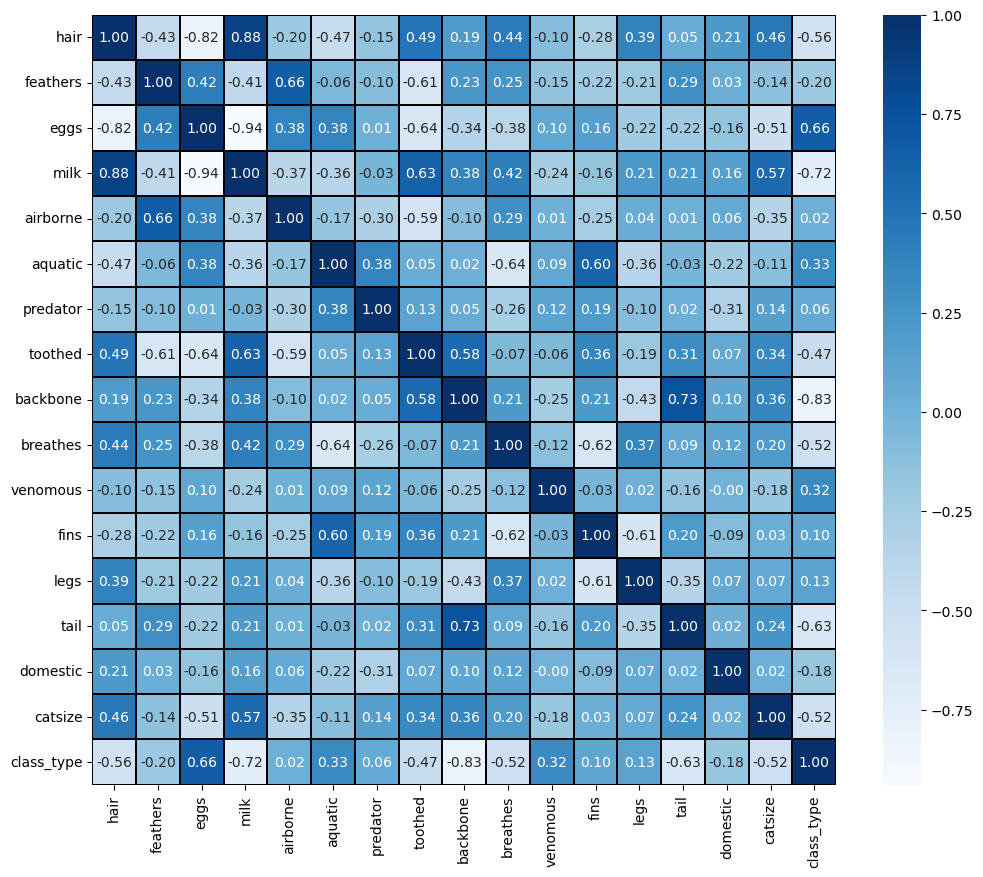

In [22]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f')       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

All columns is looking goods

# Separating the features and target variable

In [23]:
x=df.drop("class_type",axis=1)
y=df["class_type"]

In [24]:
y.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

Here i can see that data is misbalanced

# Using SMOTE method to balanced the datasets

In [25]:
from imblearn.over_sampling import SMOTE

# Set k_neighbors to 3 (or fewer if necessary)
sm = SMOTE(sampling_strategy='auto', k_neighbors=3)
x1, y1 = sm.fit_resample(x,y)

In [26]:
y1.value_counts()

1    41
4    41
2    41
7    41
6    41
5    41
3    41
Name: class_type, dtype: int64

# Find the best accuracy and best random state

In [27]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [28]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 50):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestClassifier
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    
    # Making predictions on the test set
    pred = RFR.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

In [29]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 1.0 at random_state 1


# Creating train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.30,random_state = maxRS)

Here i can see that 100 % accuracy comes

# Random Forest Classifier

In [31]:
# Instantiate and train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)

Accuracy: 0.967741935483871
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.79      0.86      0.81        31
weighted avg       0.95      0.97      0.96        31



# Support Vector Machine Classifier

In [32]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_svc)
print("Classification Report:")
print(report)

Accuracy: 0.967741935483871
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.82      0.86      0.84        31
weighted avg       0.94      0.97      0.95        31



# Gradient Boosting Classifier

In [33]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_gb=GB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_gb)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_gb)
print("Classification Report:")
print(report)

Accuracy: 0.9354838709677419
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  1]
 [ 0  0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3

    accuracy                           0.94        31
   macro avg       0.75      0.81      0.76        31
weighted avg       0.93      0.94      0.92        31



# Ada Boost Classifier

In [34]:
# Checking accuracy for AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pred_ab=AB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_ab)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ab)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_ab)
print("Classification Report:")
print(report)

Accuracy: 0.7419354838709677
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  3  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.27      1.00      0.43         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3

    accuracy                           0.74        31
   macro avg       0.32      0.43      0.35        31
weighted avg       0.67      0.74      0.69        31



# Extra Trees Classifier

In [35]:
# Checking accuracy for the ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_et=ET.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_et)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_et)
print("Classification Report:")
print(report)

Accuracy: 1.0
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



# Cross validation score

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# Checking cv socre for RandomForestClassifier
score=cross_val_score(rf,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_rf)-score.mean())

[0.98275862 1.         1.         1.         1.        ]
0.9965517241379309
Difference between Accuracy score and cross validation score is : -0.02880978865405992


In [38]:
# Checking cv socre for SupportVectorMachine
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_svc)-score.mean())

[0.95238095 0.95       0.9        0.95       0.95      ]
0.9404761904761905
Difference between Accuracy score and cross validation score is : 0.02726574500768053


In [39]:
# Checking cv socre for GradientBooster
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_gb)-score.mean())

[1.   0.9  0.95 0.95 0.95]
0.95
Difference between Accuracy score and cross validation score is : -0.014516129032258074


In [40]:
# Checking cv socre for AdaBoostingClassifier
score=cross_val_score(AB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_ab)-score.mean())

[0.71428571 0.75       0.75       0.75       0.7       ]
0.7328571428571429
Difference between Accuracy score and cross validation score is : 0.009078341013824875


In [41]:
# Checking cv socre for Extra Trees Classifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_et)-score.mean())

[0.96551724 1.         1.         1.         1.        ]
0.993103448275862
Difference between Accuracy score and cross validation score is : 0.006896551724137945


Now my random forest classifer is my best model because which is least values

# Final Model

In [42]:
Final_model = RandomForestClassifier()
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

100.0


# Predict the Zoo classification 

In [45]:
# Input data for prediction
input_zoo_classification = [0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0]

# Make a prediction using the trained SVR model
prediction = Final_model.predict([input_zoo_classification])  # Make sure to pass the input data as a list of lists

# Print the input data and predicted zoo
print("Input Data (Numerical):", input_zoo_classification)
print("predicted_zoo_animal :", prediction[0])  # Assuming prediction returns a list or array

Input Data (Numerical): [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
predicted_zoo_animal : 4


In [46]:
# Mapping the prediction to the animal class
if prediction == 1:
    print("Mammal")
elif prediction == 2:
    print("Bird")
elif prediction == 3:
    print("Reptile")
elif prediction == 4:
    print("Fish")
elif prediction == 5:
    print("Amphibian")
elif prediction == 6:
    print("Bug")
elif prediction == 7:
    print("Invertebrate")
else:
    print("Not Given")  # Handles any unexpected values

Fish


# THANK YOU